**Введение**

Анализ популярного сервиса аренды самокатов GoFast. Имеются данные о некоторых пользователях из нескольких городов, а также об их поездках. 

**Постановка задачи**

Проанализировать данные и проверить некоторые гипотезы, которые могут помочь бизнесу вырасти.

**Известные данные**

Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. Сервисом можно пользоваться:

без подписки

+ абонентская плата отсутствует;
+ стоимость одной минуты поездки — 8 рублей;
+ стоимость старта (начала поездки) — 50 рублей;

с подпиской Ultra
+ абонентская плата — 199 рублей в месяц;
+ стоимость одной минуты поездки — 6 рублей;
+ стоимость старта — бесплатно.

**Описание датасетов**

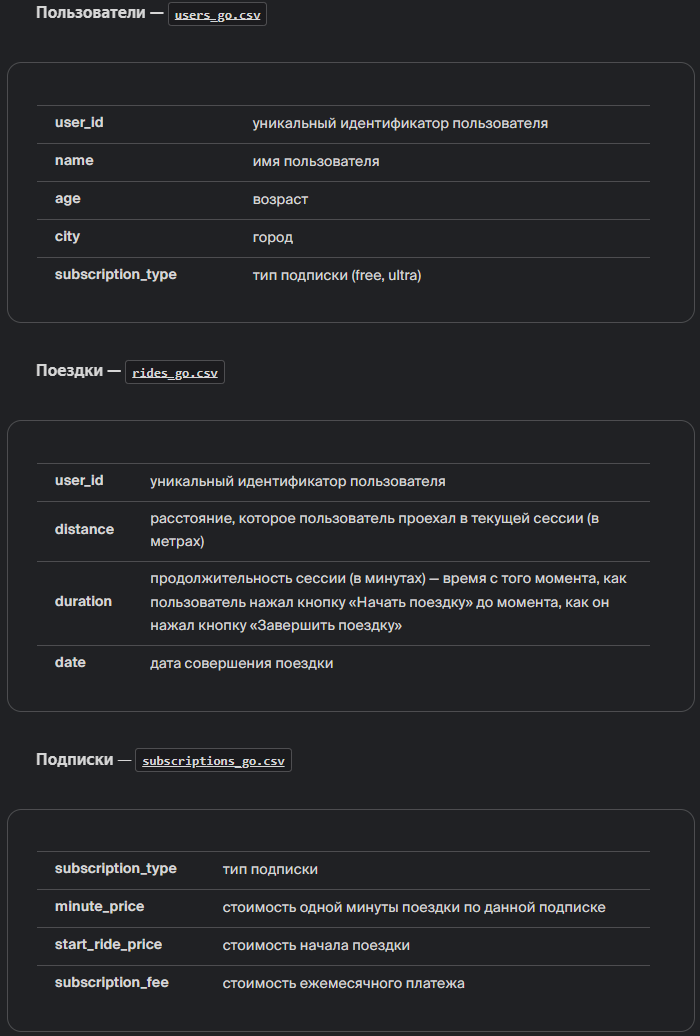

**Импорт библиотек**

In [1]:
#Импортируем "базовый" набор библиотек. Если что-то еще понадобится, то доимпортируем в процессе.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

#### Шаг 1. Загрузка данных

##### Считайте CSV-файлы с данными с помощью библиотеки pandas и сохраните их в датафреймы. 

In [2]:
users = pd.read_csv('/datasets/users_go.csv')
rides = pd.read_csv('/datasets/rides_go.csv')
subscriptions = pd.read_csv('/datasets/subscriptions_go.csv')

##### Выведите первые строки каждого набора данных. Изучите общую информацию о каждом датафрейме.

In [3]:
print(users.head())
users.info()

   user_id        name  age            city subscription_type
0        1        Кира   22          Тюмень             ultra
1        2   Станислав   31            Омск             ultra
2        3     Алексей   20          Москва             ultra
3        4  Константин   26  Ростов-на-Дону             ultra
4        5       Адель   28            Омск             ultra
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


На первый взгляд все отлично. Пропусков нет и типы данных верно подобраны.
Перейдем к следующему датафрейму.

In [4]:
print(rides.head())
rides.info()

   user_id     distance   duration        date
0        1  4409.919140  25.599769  2021-01-01
1        1  2617.592153  15.816871  2021-01-18
2        1   754.159807   6.232113  2021-04-20
3        1  2694.783254  18.511000  2021-08-11
4        1  4028.687306  26.265803  2021-08-28
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


Пропусков нет, но нужно поменять тип данных для колонки `date`. Об этом позже, пока перейдем к последнему датафрейму.

In [5]:
print(subscriptions.head())
subscriptions.info()

  subscription_type  minute_price  start_ride_price  subscription_fee
0              free             8                50                 0
1             ultra             6                 0               199
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


Пропусков нет и типы данных верны. Перейдем к предобработке

**Вывод**

Датафреймы созданы, первые строки выведены, общая информация изучена.

#### Шаг 2. Предобработка данных

##### Приведите столбец date к типу даты pandas.

In [6]:
rides['date']=pd.to_datetime(rides['date'], format='%Y-%m-%d')
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 564.8 KB


##### Создайте новый столбец с номером месяца на основе столбца date.

In [7]:
rides['month'] = rides['date'].dt.month
rides.head()

,user_id,distance,duration,date,month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8


In [8]:
print(rides['date'].min())
rides['date'].max()

2021-01-01 00:00:00


Timestamp('2021-12-30 00:00:00')

Имеются данные за весь 2021 год.

##### Проверьте наличие пропущенных значений и дубликатов в датафреймах. Обработайте их, если такие значения присутствуют.

В первом шаге проверка на пропуски уже была произведена. Пропущенных значений нет ни в одном датафрейме. Посмотрим на явные дубликаты.

In [9]:
users.duplicated().value_counts()

False    1534
True       31
dtype: int64

31 явный дубликат. Удалим их.

In [10]:
users=users.drop_duplicates()
users.duplicated().value_counts()

False    1534
dtype: int64

Отлично. Явные дубликаты удалены. Переходим к следующему датафрейму.

In [11]:
rides.duplicated().value_counts()

False    18068
dtype: int64

Явные дубликаты отсутствуют. 
Следующий.

In [12]:
subscriptions.duplicated().value_counts()

False    2
dtype: int64

Явные дубликаты отсутствуют.

**Вывод**

Столбец date приведен к типу даты pandas. Создан новый столбец с номером месяца на основе столбца date. Пропущенные значения и дубликаты в датафреймах обработаны. 

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_1: <a class="tocSkip"> </h2>
    
✅ Хорошо, проверены пропуски и дубликаты; удалены выявленные дубликаты 

#### Шаг 3. Исследовательский анализ данных

Опишите и визуализируйте общую информацию о пользователях и поездках:
+ частота встречаемости городов;
+ соотношение пользователей с подпиской и без подписки;
+ возраст пользователей;
+ расстояние, которое пользователь преодолел за одну поездку;
+ продолжительность поездок.

##### Частота встречаемости городов

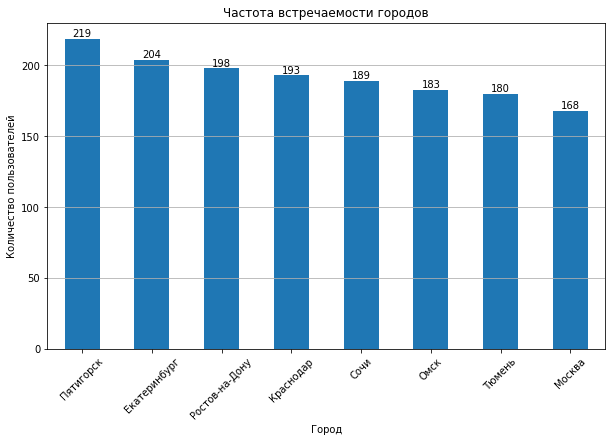

In [14]:
#Построение гистограммы
plt.figure(figsize=(10, 6))
city_counts.plot(kind='bar')
plt.title('Частота встречаемости городов')
plt.xlabel('Город')
plt.ylabel('Количество пользователей')
plt.xticks(rotation=45)
plt.grid(axis='y')

#Добавление числовых значений для каждого города
for i, count in enumerate(city_counts):
    plt.text(i, count, str(count), ha='center', va='bottom')


plt.show()

В датафрейме данные из 8 городов. Больше всего пользователей в Пятигорске, меньше всего - в Москве

##### Соотношение пользователей с подпиской и без подписки

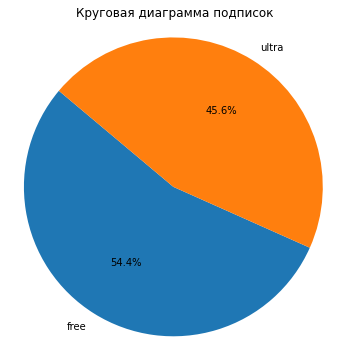

In [16]:
#Данные для пайчарта
labels = subs_counts.index
sizes = subs_counts.values

#Построение пайчарта
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Круговая диаграмма подписок')

#Отображение пайчарта
plt.axis('equal')
plt.show()

Количество пользователей с подпиской меньше, чем количество пользователей без подписки, 699 и 835 соответственно. Всего лишь 45.6% пользователей имеют подписку.

##### Возраст пользователей

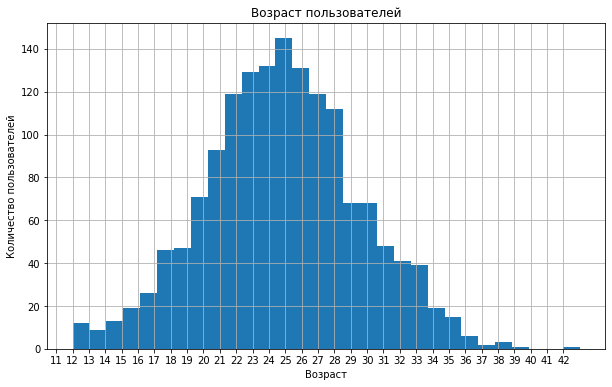

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

In [17]:
users['age'].plot(kind = 'hist', grid=True, figsize = (10,6), bins = 30)
plt.title('Возраст пользователей')
plt.xlabel('Возраст')
plt.ylabel('Количество пользователей')
plt.xticks(range(11, 43, 1))
plt.grid(True)
plt.show()

users['age'].describe()

Минимальный возраст пользователей составляет 12 лет. Максимальный - 43. Больше всего пользователей с возрастом 25.

##### Расстояние, которое пользователь преодолел за одну поездку

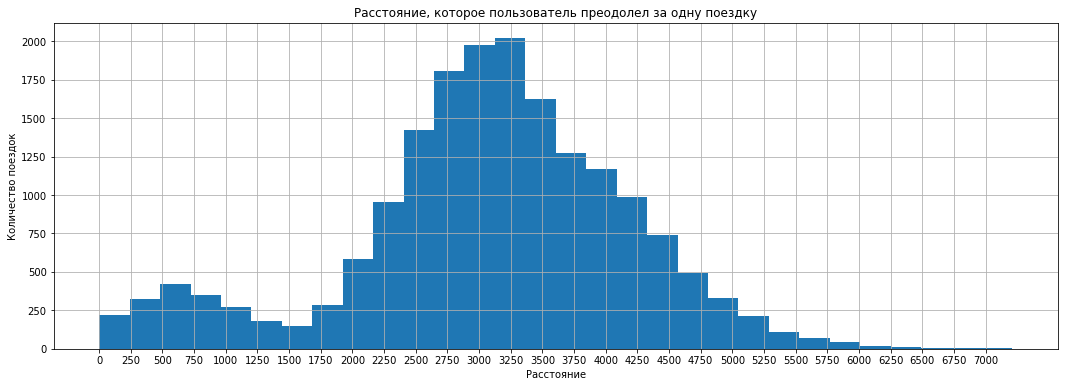

count    18068.000000
mean      3070.659976
std       1116.831209
min          0.855683
25%       2543.226360
50%       3133.609994
75%       3776.222735
max       7211.007745
Name: distance, dtype: float64

In [18]:
rides['distance'].plot(kind = 'hist', grid=True, figsize = (18,6), bins = 30)
plt.title('Расстояние, которое пользователь преодолел за одну поездку')
plt.xlabel('Расстояние')
plt.ylabel('Количество поездок')
plt.xticks(range(0, 7250, 250))
plt.grid(True)

plt.show()

rides['distance'].describe()

Самая короткая поездка составила всего 0.85м. Возможно, человек передумал ехать в последний момент или самокат разрядился. Самое большое расстоения за одну поездку равно 7211м. Чаще всего поездки совершались на расстояния 3200м - 3300м.

##### Продолжительность поездок

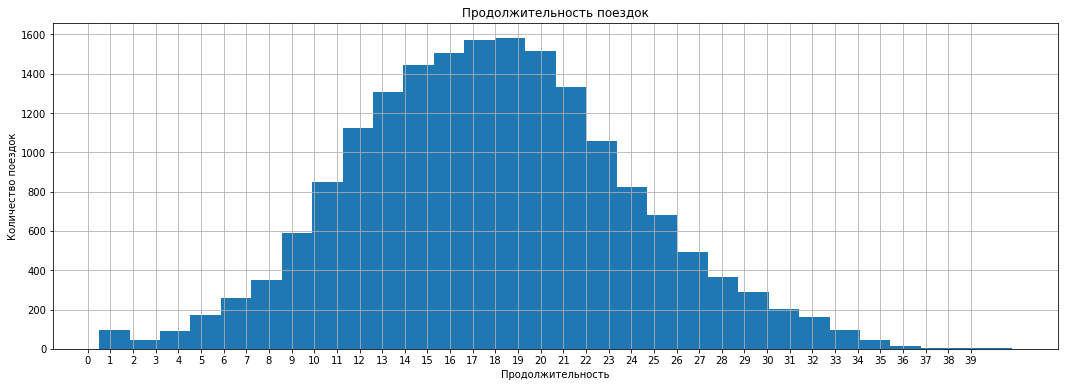

count    18068.000000
mean        17.805011
std          6.091051
min          0.500000
25%         13.597563
50%         17.678395
75%         21.724800
max         40.823963
Name: duration, dtype: float64

In [19]:
rides['duration'].plot(kind = 'hist', grid=True, figsize = (18,6), bins = 30)
plt.title('Продолжительность поездок')
plt.xlabel('Продолжительность')
plt.ylabel('Количество поездок')
plt.xticks(range(0, 40, 1))
plt.grid(True)
plt.show()

rides['duration'].describe()

Время самой короткой поездки составила лишь полминуты. а самая длинная заняла почти 41 минуту. Чаще всего поездки длились от 15 до 20 минут.

**Дополнительно можно посмотреть, есть ли в столбце с продолжительностью сессии аномалии.**

In [20]:
print(rides[rides['duration'] < 3].describe())
rides[rides['duration'] < 3].head(10)

           user_id     distance    duration       month
count   128.000000   128.000000  128.000000  128.000000
mean   1119.187500  3848.920522    1.029666    6.320312
std     246.530436  2227.759209    0.915205    3.602129
min     701.000000    11.283615    0.500000    1.000000
25%     919.000000   464.415121    0.500000    3.000000
50%    1130.000000  4711.849594    0.500000    6.000000
75%    1355.250000  5323.937502    2.040037    9.000000
max    1524.000000  7211.007745    2.999307   12.000000


,user_id,distance,duration,date,month
6531,701,4196.445201,0.500000,2021-08-31,8
6570,704,4830.824371,0.500000,2021-10-14,10
6680,712,4684.004397,0.500000,2021-03-04,3
6691,712,23.963062,2.053251,2021-11-22,11
6695,713,5215.642710,0.500000,2021-02-25,2
6768,718,5197.436649,0.500000,2021-02-11,2
6801,720,102.323624,2.292353,2021-09-20,9
6860,724,6225.520342,0.500000,2021-12-16,12
6883,726,4452.491518,0.500000,2021-03-01,3
7018,735,4406.954812,0.500000,2021-04-13,4


Странные аномальные значения. Например, строка 6531, как за 0.5 минуты, можно проехать 4196м? А 7211 метров менее, чем за 3 минуты? Скорость электросамокатов обычно ограничена 25км/ч. Для преодоления 7.2км менее, чем за 3 минуты, нужно ехать со скоростью не менее 140км/ч.

**Вывод**

В данном этапе работы были описана и визуализирована общую информацию о пользователях и поездках. 
А именно:
+ частота встречаемости городов - больше всего пользователей в Пятигорске, меньше всего - в Москве;
+ соотношение пользователей с подпиской и без подписки - с подпиской 699, без подписки 835;
+ возраст пользователей - минимальный возраст - 12 лет, максимальный - 43 года, средний - 25 лет;
+ расстояние, которое пользователь преодолел за одну поездку - самое короткое - 0.85м, самое длинное - 7211м, среднее - 3070м;
+ продолжительность поездок - самая короткая - 0.5мин, самая длинная - 41 мин, средняя - 18мин.

#### Шаг 4. Объединение данных

+ Объедините данные о пользователях, поездках и подписках в один датафрейм. Для этого воспользуйтесь методом merge().
+ Создайте ещё два датафрейма из датафрейма, созданного на этапе 4.1:
    + c данными о пользователях без подписки;
    + с данными о пользователях с подпиской.
+ Визуализируйте информацию о расстоянии и времени поездок для пользователей обеих категорий.

##### Объедините данные о пользователях, поездках и подписках в один датафрейм. Для этого воспользуйтесь методом merge().

In [21]:
#Объеденим таблицы по очереди, начнем с пользователей и поездок по 'user_id', 'left' по умолчанию.
users_merged = users.merge(rides, on='user_id')

#Теперь добавим поездки по 'subscription_type', также 'left' по умолчанию.
all_merged = users_merged.merge(subscriptions, on='subscription_type')

all_merged.head(20)

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199
5,1,Кира,22,Тюмень,ultra,2770.890808,16.650138,2021-10-09,10,6,0,199
6,1,Кира,22,Тюмень,ultra,3039.020292,14.927879,2021-10-19,10,6,0,199
7,1,Кира,22,Тюмень,ultra,2842.118050,23.117468,2021-11-06,11,6,0,199
8,1,Кира,22,Тюмень,ultra,3412.690668,15.238072,2021-11-14,11,6,0,199
9,1,Кира,22,Тюмень,ultra,748.690645,15.041884,2021-11-22,11,6,0,199


После объединения проверим, прошло ли оно корректно, не были ли потеряны данные или не появились ли лишние записи.

In [22]:
all_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18068 entries, 0 to 18067
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            18068 non-null  int64         
 1   name               18068 non-null  object        
 2   age                18068 non-null  int64         
 3   city               18068 non-null  object        
 4   subscription_type  18068 non-null  object        
 5   distance           18068 non-null  float64       
 6   duration           18068 non-null  float64       
 7   date               18068 non-null  datetime64[ns]
 8   month              18068 non-null  int64         
 9   minute_price       18068 non-null  int64         
 10  start_ride_price   18068 non-null  int64         
 11  subscription_fee   18068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(3)
memory usage: 1.8+ MB


Пропущенных значений нет, что логично, ведь их не было и в отдельных датафреймах.

In [24]:
print('Кол-во уникальных user_id в датафрейме users:',len(users['user_id'].unique()))
print('Кол-во уникальных user_id в датафрейме all_merged:',len(all_merged['user_id'].unique()))

Кол-во уникальных user_id в датафрейме users: 1534
Кол-во уникальных user_id в датафрейме all_merged: 1534


In [25]:
print('Кол-во поездок в датафрейме rides:', rides['user_id'].count())
print('Кол-во поездок в датафрейме all_merged:', all_merged['user_id'].count())

Кол-во поездок в датафрейме rides: 18068
Кол-во поездок в датафрейме all_merged: 18068


Как видим, все объеденилось без потерь и пропусков.

##### Создайте ещё два датафрейма из датафрейма, созданного на этапе 4.1.



###### C данными о пользователях без подписки.

In [26]:
users_without_sub = all_merged[all_merged['subscription_type']== 'free'].reset_index(drop=True)
users_without_sub.head(10)

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,700,Айдар,22,Омск,free,2515.690719,14.944286,2021-01-02,1,8,50,0
1,700,Айдар,22,Омск,free,846.932642,16.234663,2021-02-01,2,8,50,0
2,700,Айдар,22,Омск,free,4004.434142,20.016628,2021-02-04,2,8,50,0
3,700,Айдар,22,Омск,free,1205.911290,9.782872,2021-02-10,2,8,50,0
4,700,Айдар,22,Омск,free,3047.379435,17.427673,2021-02-14,2,8,50,0
5,700,Айдар,22,Омск,free,4342.002254,22.368009,2021-02-23,2,8,50,0
6,700,Айдар,22,Омск,free,3798.334905,18.243756,2021-03-03,3,8,50,0
7,700,Айдар,22,Омск,free,2984.551206,15.424899,2021-04-09,4,8,50,0
8,700,Айдар,22,Омск,free,3360.107141,16.765497,2021-06-12,6,8,50,0
9,700,Айдар,22,Омск,free,2567.543847,11.312160,2021-06-23,6,8,50,0


###### C данными о пользователях с подпиской.

In [27]:
users_with_sub = all_merged[all_merged['subscription_type'] == 'ultra'].reset_index(drop=True)
users_with_sub.head(10)

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199
5,1,Кира,22,Тюмень,ultra,2770.890808,16.650138,2021-10-09,10,6,0,199
6,1,Кира,22,Тюмень,ultra,3039.020292,14.927879,2021-10-19,10,6,0,199
7,1,Кира,22,Тюмень,ultra,2842.118050,23.117468,2021-11-06,11,6,0,199
8,1,Кира,22,Тюмень,ultra,3412.690668,15.238072,2021-11-14,11,6,0,199
9,1,Кира,22,Тюмень,ultra,748.690645,15.041884,2021-11-22,11,6,0,199


##### Визуализируйте информацию о расстоянии и времени поездок для пользователей обеих категорий.

Визуализируем информацию о расстоянии поездок для пользователей обеих категорий.

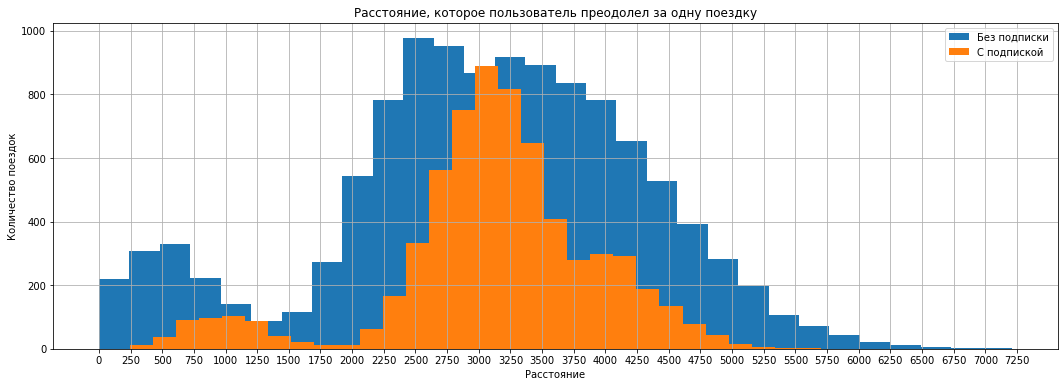

count    11568.000000
mean      3045.495282
std       1246.173806
min          0.855683
25%       2366.562689
50%       3114.648465
75%       3905.697894
max       7211.007745
Name: distance, dtype: float64


count    6500.000000
mean     3115.445388
std       836.895330
min       244.210438
25%      2785.444017
50%      3148.637229
75%      3560.574425
max      5699.769662
Name: distance, dtype: float64

In [28]:
#Без подписки
users_without_sub['distance'].plot(kind = 'hist', grid=True, figsize = (18,6), bins = 30, label='Без подписки')

#С подпиской
users_with_sub['distance'].plot(kind = 'hist', grid=True, figsize = (18,6), bins = 30, label='С подпиской')

#Настройки графика
plt.title('Расстояние, которое пользователь преодолел за одну поездку')
plt.xlabel('Расстояние')
plt.ylabel('Количество поездок')
plt.xticks(range(0, 7500, 250))
plt.grid(True)
plt.legend()
plt.show()

print(users_without_sub['distance'].describe())
users_with_sub['distance'].describe()

Пользователи без подписки совершают больше поездок, чем пользователи с подпиской - 11568 против 6500. Средние значения, в целом, схожи, но поездки пользователей без подписки более разнообразны, если посмотреть на график и на значения отклонений.

Визуализируем информацию о длительности поездок для пользователей обеих категорий.

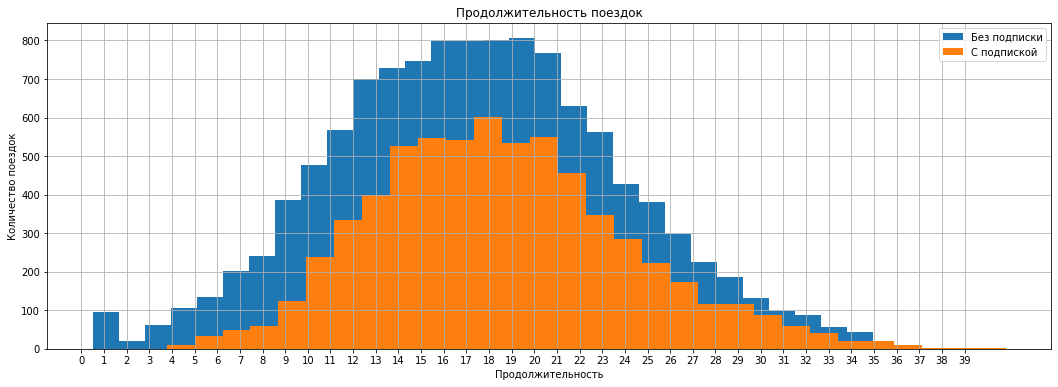

count    11568.000000
mean        17.390909
std          6.326803
min          0.500000
25%         12.958437
50%         17.326890
75%         21.594071
max         34.948498
Name: duration, dtype: float64


count    6500.000000
mean       18.541985
std         5.572048
min         3.760353
25%        14.524654
50%        18.178153
75%        21.884129
max        40.823963
Name: duration, dtype: float64

In [29]:
#Без подписки
users_without_sub['duration'].plot(kind = 'hist', grid=True, figsize = (18,6), bins = 30, label='Без подписки')

#С подпиской
users_with_sub['duration'].plot(kind = 'hist', grid=True, figsize = (18,6), bins = 30, label='С подпиской')

#Настройки графика
plt.title('Продолжительность поездок')
plt.xlabel('Продолжительность')
plt.ylabel('Количество поездок')
plt.xticks(range(0, 40, 1))
plt.grid(True)
plt.legend()
plt.show()

print(users_without_sub['duration'].describe())
users_with_sub['duration'].describe()

Продолжительность поездок пользователей без подписки соответствует продолжительности поездок пользователей с подпиской.

Пользователей без подписки просто больше, поэтому кол-во поездок выше. В целом продолжительносмть поездок пользователей без подписки соответствует продолжительности поездок пользователей с подпиской. Это видно на графике, а также по показателям std, mean и 50%. Для сабов и ансабов они не сильно не отличаются.

#### Шаг 5. Подсчёт выручки

* Создайте датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными из шага 4.
* В этот же датафрейм добавьте столбец с помесячной выручкой, которую принёс каждый пользователь. Для этого обратитесь к информации об условиях оплаты для подписчиков и тех, у кого нет подписки.

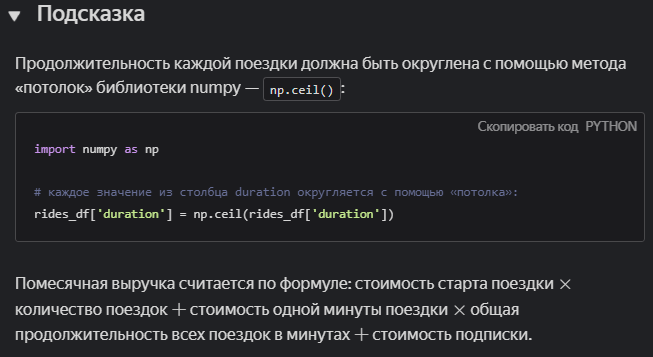

##### Создайте датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными из шага 4: найдите суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.

In [30]:
#Округляем, как написано в подсказке
all_merged['duration'] = np.ceil(all_merged['duration'])

In [31]:
aggregated_data = all_merged.groupby(['user_id', 'month']).agg({
    'distance': 'sum',        #Суммарное расстояние
    'duration': 'sum',        #Суммарное время
    'date': 'count'        #Количество поездок
}).reset_index()

aggregated_data.rename(columns={
    'distance': 'distance_per_month',
    'duration': 'duration_per_month',
    'date': 'rides_per_month'
}, inplace=True)

aggregated_data

,user_id,month,distance_per_month,duration_per_month,rides_per_month
0,1,1,7027.511294,42.0,2
1,1,4,754.159807,7.0,1
2,1,8,6723.470560,46.0,2
3,1,10,5809.911100,32.0,2
4,1,11,7003.499363,56.0,3
...,...,...,...,...,...
11326,1534,6,3409.468534,26.0,2
11327,1534,8,7622.453034,48.0,2
11328,1534,9,4928.173852,23.0,1
11329,1534,11,13350.015305,78.0,4


##### В этот же датафрейм добавьте столбец с помесячной выручкой, которую принёс каждый пользователь. Для этого обратитесь к информации об условиях оплаты для подписчиков и тех, у кого нет подписки. Продолжительность каждой поездки в каждой строке исходного датафрейма для подсчёта стоимости округляется до следующего целого числа: например, значения 25.3, 25.5 и 26.0 должны быть преобразованы к 26.

Добавим столбец с данными о подписке для простоты создания функции для вычисления прибыли.

In [32]:
aggregated_data = aggregated_data.merge(users[['user_id', 'subscription_type']], on='user_id', how='left')
aggregated_data.head()

,user_id,month,distance_per_month,duration_per_month,rides_per_month,subscription_type
0,1,1,7027.511294,42.0,2,ultra
1,1,4,754.159807,7.0,1,ultra
2,1,8,6723.470560,46.0,2,ultra
3,1,10,5809.911100,32.0,2,ultra
4,1,11,7003.499363,56.0,3,ultra


In [33]:
def calculate_monthly_revenue(subscription_type, duration_per_month, rides_per_month):
    
    #Получение информации о подписке
    subscription_info = subscriptions.loc[subscriptions['subscription_type'] == subscription_type].iloc[0]
    
    #Расчет месячной выручки
    minute_price = subscription_info["minute_price"]
    start_ride_price = subscription_info["start_ride_price"]
    subscription_fee = subscription_info["subscription_fee"]
    
    monthly_revenue = (
        duration_per_month * minute_price +
        rides_per_month * start_ride_price +
        subscription_fee
    )
    
    return monthly_revenue

In [34]:
#Добавление нового столбца с месячной выручкой
aggregated_data['monthly_revenue'] = aggregated_data.apply(
    lambda row: calculate_monthly_revenue(row['subscription_type'], row['duration_per_month'], row['rides_per_month']),
    axis=1
)

aggregated_data.head()

,user_id,month,distance_per_month,duration_per_month,rides_per_month,subscription_type,monthly_revenue
0,1,1,7027.511294,42.0,2,ultra,451.0
1,1,4,754.159807,7.0,1,ultra,241.0
2,1,8,6723.470560,46.0,2,ultra,475.0
3,1,10,5809.911100,32.0,2,ultra,391.0
4,1,11,7003.499363,56.0,3,ultra,535.0


**Вывод**

Создан датафрейм `aggregated_data` с агрегированными данными о поездках на основе датафрейма с объединёнными данными из шага 4. Найдены суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц. Также добавлен столбец `monthly_revenue` с помесячной выручкой, которую принёс каждый пользователь . 

#### Шаг 6. Проверка гипотез

Продакт-менеджеры сервиса хотят увеличить количество пользователей с подпиской. Для этого они будут проводить различные акции, но сначала нужно выяснить несколько важных моментов.
+ Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании. Проверьте гипотезу. Используйте исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки.
+ Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? Проверьте гипотезу и сделайте выводы.
+ Проверьте гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. Сделайте вывод.
+ Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?

##### Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании. Проверьте гипотезу. Используйте исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки.

Иными словами, гипотеза состоит в том, что среднее значение `duration` для пользователей с подпиской выше, чем среднее значение `duration` для пользователей без подписки.  
Нулевая гипотеза: среднее время поездок пользователей с подпиской равно среднему времени поездок пользователей без подписки. Альтернативная гипотеза: пользователи с подпиской тратят больше времени на поездки, чем пользователи без подписки.

In [36]:
#Уровень значимости
alpha = 0.05

#Проведение t-теста
results = st.ttest_ind(users_with_sub['duration'], users_without_sub['duration'], alternative ='greater')

print('p-значение:', results.pvalue)

#Вывод результатов
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу: среднее время поездок пользователей с подпиской выше среднего времени поездок пользователей без подписки.")
else:
    print("Не отвергаем нулевую гипотезу: среднее время поездок пользователей с подпиской равно среднему времени поездок пользователей без подписки.")

p-значение: 1.2804098316645618e-34
Отвергаем нулевую гипотезу: среднее время поездок пользователей с подпиской выше среднего времени поездок пользователей без подписки.


##### Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? Проверьте гипотезу и сделайте выводы.

Гипотеза состоит в том, что среднее значение distance для пользователей с подпиской меньше 3130.
Нулевая гипотеза: среднее расстояние поездок пользователей с подпиской равно 3130м.
Альтернативная гипотеза: среднее расстояние поездок пользователей с подпиской выше 3130м.

In [38]:
#Оптимальное расстояние
optimal_distance = 3130

#Уровень значимости
alpha = 0.05

#Проведение t-теста
results = st.ttest_1samp(users_with_sub['distance'], optimal_distance, alternative ='greater')

print('p-значение:', results.pvalue)

#Вывод результатов
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу: среднее расстояние поездок пользователей с подпиской превышает 3130 метров")
else:
    print("Не отвергаем нулевую гипотезу: среднее расстояние поездок пользователей с подпиской не превышает 3130 метров")

p-значение: 0.9195368847849785
Не отвергаем нулевую гипотезу: среднее расстояние поездок пользователей с подпиской не превышает 3130 метров


Если пользователи с подпиской часто превышают оптимальное расстояние, это может привести к увеличению износа самокатов и, как следствие, к более частым техосмотрам или заменам самокатов. Если пользователи с подпиской часто ездят на дальние расстояния, это может свидетельствовать о потенциале роста спроса на услуги сервиса в рамках более дальних поездок и возможности внедрения дополнительных услуг или тарифов для таких пользователей.

##### Проверьте гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. Сделайте вывод.

Иными словами, гипотеза состоит в том, что среднее значение `monthly_revenue` для пользователей с подпиской выше, чем среднее значение `monthly_revenue` для пользователей без подписки.

Нулевая гипотеза: помесячная выручка от пользователей с подпиской по месяцам равна помесячной выручке от пользователей без подписки.  Альтернативная гипотеза: помесячная выручка от пользователей с подпиской по месяцам выше, чем от пользователей без подписки.

In [39]:
#Уровень значимости
alpha = 0.05

#Проведение t-теста
results = st.ttest_ind(subscribers['monthly_revenue'], non_subscribers['monthly_revenue'], alternative ='greater')

print('p-значение:', results.pvalue)

#Вывод результатов
if results.pvalue < 0.05:
    print("Отвергаем нулевую гипотезу: есть основания утверждать, что помесячная выручка от пользователей с подпиской выше.")
else:
    print("Не отвергаем нулевую гипотезу: есть основания утверждать, что помесячная выручка от пользователей с подпиской равна помесячной выручке от пользователей без подписки.")

p-значение: 1.8850394384715216e-31
Отвергаем нулевую гипотезу: есть основания утверждать, что помесячная выручка от пользователей с подпиской выше.


Это может указывать на то, что модель подписки привлекательна для пользователей и может способствовать стабильному и повторяющемуся доходу. Есть чем покрасоваться перед инвесторами.  
Подписка обычно предоставляет пользователям дополнительные преимущества или скидки, что может стимулировать их к частым и продолжительным пользованиям услугами компании.

##### Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?

scipy.stats.ttest_rel

Считаю, что нужно использовать данный тест, потому что речь идет о двух зависимых парных выборках. Проверяется гипотеза о равенстве среднего значения генеральной совокупности до и после изменения.

Правосторонняя альтернативная гипотеза проверит, что истинное среднее генеральной совокупности до изменения выше, чем после.

**Вывод**


+ Гипотеза о том, что пользователи с подпиской тратят больше времени на поездки была отвергнута. В среднем пользователи тратят на поездки столько же или меньше времени, чем пользователи без подписки.

+ Гипотеза о том, что  среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров, также была отвергнута. Пользователи с подпиской в среднем проезжают большее расстояние.

+ Гипотеза о том, что помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки, была подтверждена.


#### Шаг 7. Распределения

* Отделу маркетинга GoFast поставили задачу: нужно провести акцию с раздачей промокодов на один бесплатный месяц подписки, в рамках которой как минимум 100 существующих клиентов должны продлить эту подписку. То есть по завершении периода действия  подписки пользователь может либо отказаться от неё, либо продлить, совершив соответствующий платёж. Эта акция уже проводилась ранее и по итогу выяснилось, что после бесплатного пробного периода подписку продлевают 10 % пользователей. Выясните, какое минимальное количество промокодов нужно разослать, чтобы вероятность не выполнить план была примерно 5 %. Подберите параметры распределения, описывающего эту ситуацию, постройте график распределения и сформулируйте ответ на вопрос о количестве промокодов.

* Отдел маркетинга рассылает клиентам push-уведомления в мобильном приложении. Клиенты могут открыть его или не открывать. Известно, что уведомления открывают около 40 % получивших клиентов. Отдел планирует разослать 1 млн уведомлений. С помощью аппроксимации постройте примерный график распределения и оцените вероятность того, что уведомление откроют не более 399,5 тыс. пользователей.

##### Отделу маркетинга GoFast поставили задачу: нужно провести акцию с раздачей промокодов на один бесплатный месяц подписки, в рамках которой как минимум 100 существующих клиентов должны продлить эту подписку.

То есть по завершении периода действия подписки пользователь может либо отказаться от неё, либо продлить, совершив соответствующий платёж.  
Эта акция уже проводилась ранее и по итогу выяснилось, что после бесплатного пробного периода подписку продлевают 10 % пользователей. Выясните, какое минимальное количество промокодов нужно разослать, чтобы вероятность не выполнить план была примерно 5 %. Подберите параметры распределения, описывающего эту ситуацию, постройте график распределения и сформулируйте ответ на вопрос о количестве промокодов.

Мы можем воспользоваться биномиальным распределением для оценки вероятности того, что из некоторого числа клиентов, получивших промокод, не менее 100 продлят подписку. Каждый клиент, получивший промокод - "эксперимент", а вероятность успеха (продления подписки) составляет 0.10.

In [40]:
#Импортируем библиотеку
from scipy.stats import binom
from math import factorial

Минимальное количество промокодов: 1161


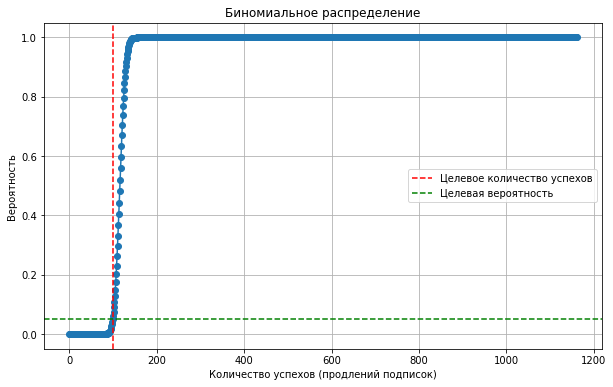

In [41]:
# Заданные параметры
p_success = 0.10  # Вероятность успеха (продления подписки)
target_success = 100  # Целевое количество успехов (продлений подписок)
target_prob = 0.05  # Целевая вероятность не выполнения плана

# Начинаем с 1000
n_promocodes = 1000

# Пока вероятность не выполнения плана больше целевой вероятности
while binom.cdf(target_success - 1, n_promocodes, p_success) > target_prob:
    n_promocodes += 1

print("Минимальное количество промокодов:", n_promocodes)

# Построение графика биномиального распределения
plt.figure(figsize=(10, 6))
x = range(n_promocodes + 1)
y = binom.cdf(x, n_promocodes, p_success)
plt.plot(x, y, marker='o', linestyle='-')
plt.title('Биномиальное распределение')
plt.xlabel('Количество успехов (продлений подписок)')
plt.ylabel('Вероятность')
plt.axvline(x=target_success, color='r', linestyle='--', label='Целевое количество успехов')
plt.axhline(y=target_prob, color='g', linestyle='--', label='Целевая вероятность')
plt.legend()
plt.grid(True)

plt.show()


##### Отдел маркетинга рассылает клиентам push-уведомления в мобильном приложении. Клиенты могут открыть его или не открывать. 

Известно, что уведомления открывают около 40 % получивших клиентов. Отдел планирует разослать 1 млн уведомлений. С помощью аппроксимации постройте примерный график распределения и оцените вероятность того, что уведомление откроют не более 399,5 тыс. пользователей.

In [42]:
from scipy.stats import norm

In [43]:
#Заданные параметры
n=1000000
p=0.4

#Зададим мат.ожидание и ст.отклонение нормального распределения равными мат.ожиданию и ст.отклонению биномиального распределения
mu = n * p
sigma = np.sqrt(n * p * (1 - p))

#Задаём нормальное распределение
distr = st.norm(mu, sigma)

# считаем вероятность хвоста слева от 399,5 тысяч
result = distr.cdf(399500)

result

0.15371708296369768

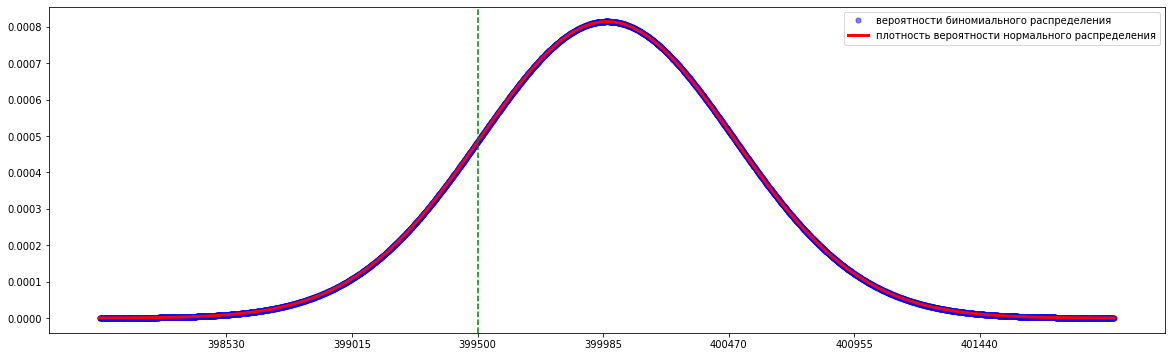

In [44]:
plt.figure(figsize=(20, 6))

#Построим график
left = int(n * p - 4 * np.sqrt(n * p * (1 - p)))
right = int(n * p + 4 * np.sqrt(n * p * (1 - p)))
 
# зададим набор значений биномиальной величины на выбранном промежутке:
# все неотрицательные целые числа от left до right
x = list(range(max(0, left), right))
# рисуем график биномиального распределения
ax = plt.subplot()
# используем синие о-образные маркеры и размер маркера 5
ax.plot(x, binom.pmf(x, n, p), 'bo', ms=5, alpha=0.5, label='вероятности биномиального распределения')

# рисуем график нормального распределения:
# получим список из 100 чисел от left до right
x = np.linspace(left, right, 100)
# используем красную линию ширины 3 и прозрачности 0.3
ax.plot(x, norm.pdf(x, mu, sigma), 'r-', lw=3, alpha=1, label='плотность вероятности нормального распределения')
 
# зададим подписи по оси x в пределах ± 3 ст.отклонений от мат.ожидания
# (последний аргумент в методе range - интервал между подписями)
x_ticks = list(range(int(mu - 3 * sigma), int(mu + 3 * sigma), 485))
ax.set_xticks(x_ticks)

plt.axvline(x=399500, color='g', linestyle='--')

# настраиваем оптимальное расположение легенды и выводим график
ax.legend(loc='best')
plt.show()

Вероятность того, что уведомления откроют меньше 399500 человек - 15%

#### Общий вывод

Входе выполнения данной работы была сначал проведена предобработка данных, по результатам которой столбец date приведен к типу даты pandas, создан новый столбец с номером месяца на основе столбца date, а также обработаны все пропущенные значения и дубликаты в датафреймах.

Далее был произведен исследовательский анализ данных и построены гистограммы. В результате проведенного анализа было установлено: 
+ больше всего пользователей в Пятигорске, меньше всего - в Москве;
+ пользователей с подпиской 699, без подписки 835;
+ минимальный возраст пользователей - 12 лет, максимальный - 43 года, средний - 25 лет;
+ самое короткое расстояние, которое пользователь преодолел за одну поездку - 0.85м, самое длинное - 7211м, среднее - 3070м;
+ самая короткая поездка - 0.5мин, самая длинная - 41 мин, средняя - 18мин.

Следующим было выполнено объединение данных, которое показало пользователи без подписки совершают больше поездок, чем пользователи с подпиской - 11568 против 6500. Средние значения, в целом, были схожи, но поездки пользователей без подписки более разнообразны, если посмотреть на график и на значения отклонений. Также установлено, что продолжительность поездок пользователей без подписки соответствует продолжительности поездок пользователей с подпиской.

На следующем этапе была подсчитана помесячная выручка, которую принёс каждый пользователь.

За этим следовал этап проверки гипотез, в котором гипотеза о том, что пользователи с подпиской тратят больше времени на поездки была отвергнута. Выяснилось, что в среднем пользователи тратят на поездки столько же или меньше времени, чем пользователи без подписки.  
Подтвердилась гипотеза о том, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров.  
В свою очередь гипотеза о том, что помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки, была подтверждена.

Наконец последним этапом были распределения. На данном этапе было установлено минимальное количество промокодов, которое нужно было разослать, чтобы вероятность не выполнить план была примерно 5 %, подобраны параметры распределения, описывающего эту ситуацию, построен график распределения и сформулирован ответ на вопрос о количестве промокодов. Также был дан ответ на вопрос касательно push-уведомлений в мобильном приложении. С помощью аппроксимации построен римерный график распределения и оценена вероятность того, что уведомление открыли не более 399,5 тыс. пользователей.

На основе вышеизложенного, можно говорить о том, что более выгодными пользователями сервиса аренды самокатов являются пользователи с подпиской. Поэтому сервису рекомендуется сосредоточиться на продвижении и увеличения привлекательности подписочной модели для пользователей без подписки. Пользователи с подпиской не только приносят вырочку выше, но также их поездки в среднем не превышают оптимального для обслуживания самокатов расстояния.